In [47]:
import numpy as np
import matplotlib.pyplot as plt
from Helper import *
from scipy.interpolate import make_interp_spline, BSpline, pchip
from scipy.stats import pearsonr, spearmanr, kendalltau, chisquare

In [48]:
#GRAPHS#
VERY_SMALL_SIZE = 14
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

blue = 'royalblue'
red = 'crimson'
col1 = 'darkmagenta'
col2 = 'goldenrod'
col3 = 'mediumturquoise'
col4 ='forestgreen'
col5 = 'navy'
plt.rcParams['figure.figsize'] = [20, 5]
cols7 = [col1,col2, col3, col4, col5, red, blue]

In [49]:
# constants

# 0 - male, 1 - female 
gender = [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, # player 0 - 16
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, # 17 - 32
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, # 33 - 48
         0, 0, 0, 0, 1, 1, 1, 1, 0, 0 ,0 ,0, 0, 0, 0, 0 ] # 49 - 64 

armLength = [28, 23.5, 27, 27, 28, 27, 28, 26, 23, 26, 24, 26, 27, 24, 29, 29]

players = [2, 7, 11, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62]

pathPerceivedEffort = "E:\\Andreea\\Master\\Thesis\\Git\\TheOne\\SmartuistWrapper\\perceivedEffortParticipants.csv"
path = "E:\\Andreea\\Master\\Thesis\\Git\\TheOne\\SmartuistWrapper\\tapResultParticipants.csv"
questions = ["Physical Demand", "Performance", "Frustration"]
idxLength = 28
idxGain = 29

In [50]:
def readPerceivedEffortPhase1(path, players):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    count = 0
    for x in f:
        line = x.split(',')
        if(int(line[0]) in players):
            if int(line[0]) != player:
                player = int(line[0])
                results[player] = []
            tmp = []
            for i in range(2, 5):
                tmp.append(int(line[i]))
            results[player].append(tmp)
            
        count += 1
    f.close()
    return results

def getResultsForPlayers(results, players):
    resultsPlayers = []
    for p in players: 
        resultsPlayers.append(results[p])
    return np.array(resultsPlayers)  

# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    count = 10
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values

# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]  
    return (list1, list2)

def findCorelation(data1, data2, label=""):
    print(label)
    
    # calculate pearson's correlation --- not noramlly distributed
#     coef, p = pearsonr(data1, data2) 
#     print('Pearsons correlation p-value: %.7f' % p, coef)
    
    # calculate spearman's correlation
    coef, p = spearmanr(data1, data2) 
    print('Spearmans correlation p-value: %.9f & ' % p, coef)
    
     # calculate kendall's correlation
    coef, p = kendalltau(data1, data2)
    print('Kendall correlation p-value: %.9f' % p, coef)
    print(" ")
    
def inter(x,y, points):
    xnew = np.linspace(x.min(),x.max(),points) #300 represents number of points to make between T.min and T.max

    spl = pchip(x, y) #BSpline object
    newY = spl(xnew)
    return(xnew,newY)

In [51]:
# perceived effort in phase1

resultsPerceivedEffort  = readPerceivedEffortPhase1(pathPerceivedEffort, players)
resultsPerceivedEffort = getResultsForPlayers(resultsPerceivedEffort, players)
resultsTap = readFromFile(path, players)

lengths = []       
gainAll = []  
for p in players:
    lengths.append(getResultPerPlayer(p, resultsTap, 28, True ))
    gainAll.append(getResultPerPlayer(p, resultsTap, 29, True ))


 
    
lengths = np.array([lengths])        
lengthsCorrect = []
for i in range(len(gainAll)): 
    l = lengths[0][i]
    for j in range(len(l)-1, 0, -1):   
        l[j] = l[j-1] * armLength[i]/100
    l[0] = l[0] * armLength[i]/100
    lengthsCorrect.append(l) #

  



In [52]:
#remove first column for each participant (gain = -1)
[r.pop(0) for r in lengthsCorrect]
[r.pop(0) for r in gainAll] 

# flatten lists 
mergedLengths = [item for sublist in lengthsCorrect for item in sublist]
mergedFitness = [item for sublist in gainAll for item in sublist]
perceivedE = [item for sublist in resultsPerceivedEffort for item in sublist]

In [53]:
# fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))
# fig.suptitle(" useless  box plots", y = 1.05)
# for i in range (0,3):
#     base = np.array(perceivedE)[:,i]
#     axs[i].boxplot([ list(base)], labels= ["Baseline"])
#     axs[i].set_title('Q'+str(i) + ": " + questions[i])
#     axs[i].grid(True)

# plt.show()

In [62]:

Q1 =  np.array(perceivedE)[:,0]
Q2 =  np.array(perceivedE)[:,1]
Q3 =  np.array(perceivedE)[:,2]

_, Q1_sorted = getCombinedPlot(mergedLengths, Q1)
_, Q2_sorted = getCombinedPlot(mergedLengths, Q2)
l_sorted, Q3_sorted = getCombinedPlot(mergedLengths, Q3)

In [64]:
# count per questions
def getCount(Q, l): # l is all lenghts for all participants sorted
    step = 0.25 # 1 
    maxL = 3 #12
    start = 0.25 #1
    i = 0
    binn = 0
    countsPerLenght = np.array([[0] * 7] * (int((maxL / step) )  ))
   
    averagePerLength = np.array([0.0] * (int((maxL / step) ) ))
    lengths = np.array([0.0] * (int((maxL / step) )  ))
    
    while(start < maxL and i < len(l)):
        if (l[i] > start):
            binn += 1
            lengths[binn -1] = start
            start += step
       
        countsPerLenght[binn][Q[i] - 1] += 1
        averagePerLength[binn] += Q[i] 
        i+=1
    
    #weight average 
    lengths[binn] = start     
    for i in range(len(countsPerLenght)):
        s = 0
        for j in range(len(countsPerLenght[i])):
            s += countsPerLenght[i][j]  * j
        averagePerLength[i] = s/ sum(countsPerLenght[i]) 
        
    fqPerLenght = np.array([[0.0] * 7] * (int((maxL / step) )  ))
    totalNrAnswersPerLength = []
    
    # get frequency per question per length
    for i in range(len(countsPerLenght)):
        total = sum(countsPerLenght[i])
        totalNrAnswersPerLength.append(total)
        for j in range(len(countsPerLenght[i])):
            fqPerLenght[i][j] = 100.0 * float(countsPerLenght[i][j]) / total
          #  print(i, j,  fqPerLenght[i][j] )
    return (countsPerLenght, lengths, averagePerLength, fqPerLenght, totalNrAnswersPerLength)

def plotBarChartWithCounts(QuestionCounts, QLengths, idx, labels, stacked=False):
    cols7 = [ 0.95, 0.85, 0.75, 0.65, 0.55, 0.45, 0.3 ]
    fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(20,6))
   
    blue_map = plt.get_cmap('coolwarm')
    # plot counts
    bar_width = 0.2
    opacity = 0.8

    for i in range(len(QLengths)):
        for j in range(0, len( QuestionCounts[i])):
            if(i == 0):
                plt.barh(QLengths[i], QuestionCounts[i][j], bar_width, color=blue_map(cols7[j]), 
                         label=labels[j])
               # print(i, j, QuestionCounts[i][j] )
            else:
                plt.barh(QLengths[i], QuestionCounts[i][j], bar_width,  color=blue_map(cols7[j]))
              #  print(i, j, QuestionCounts[i][j] )

    ylabels = ["(" + str(0) + "-" + str(QLengths[0]) + ")"]
    for i in range(1,len(QLengths)):
        ylabels.append("(" + str(QLengths[i-1]) + "-" + str(QLengths[i]) + ")")

    axs.set_xlabel('Count')
    axs.set_ylabel('Length')
    
    plt.yticks(LQ1, ylabels)
   #xs.set_title(questions[idx])
    axs.legend( loc='upper right', ncol = 7,  bbox_to_anchor=(.85, 1.2))
    plt.tight_layout()
    plt.show()

In [ ]:
countsPerLengthQ1, LQ1, avg1, fq1, total1 = getCount(Q1_sorted, l_sorted)
countsPerLengthQ2, LQ2, avg2, fq2, total2 = getCount(Q2_sorted, l_sorted)
countsPerLengthQ3, LQ3, avg3, fq3, total3 = getCount(Q3_sorted, l_sorted)

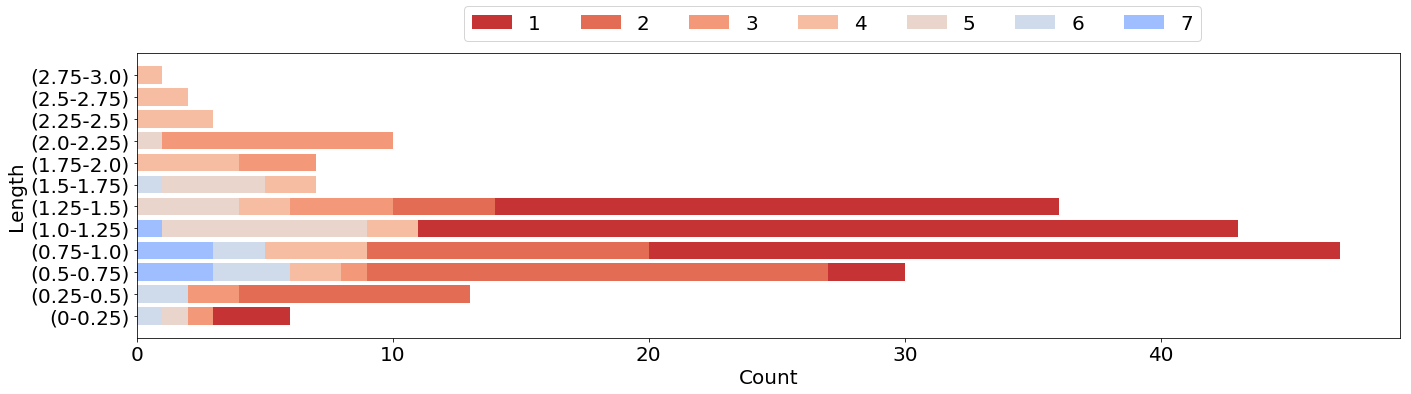

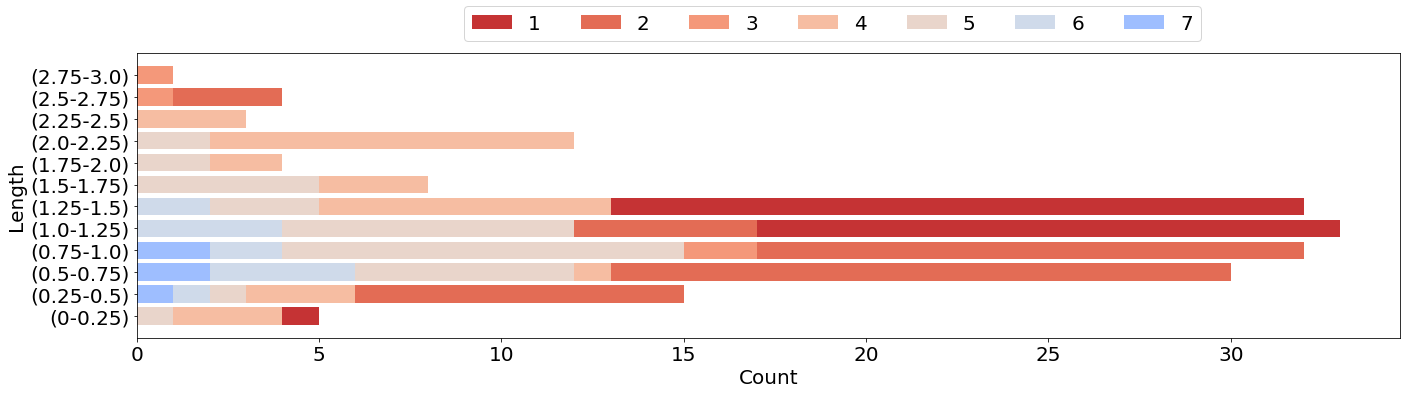

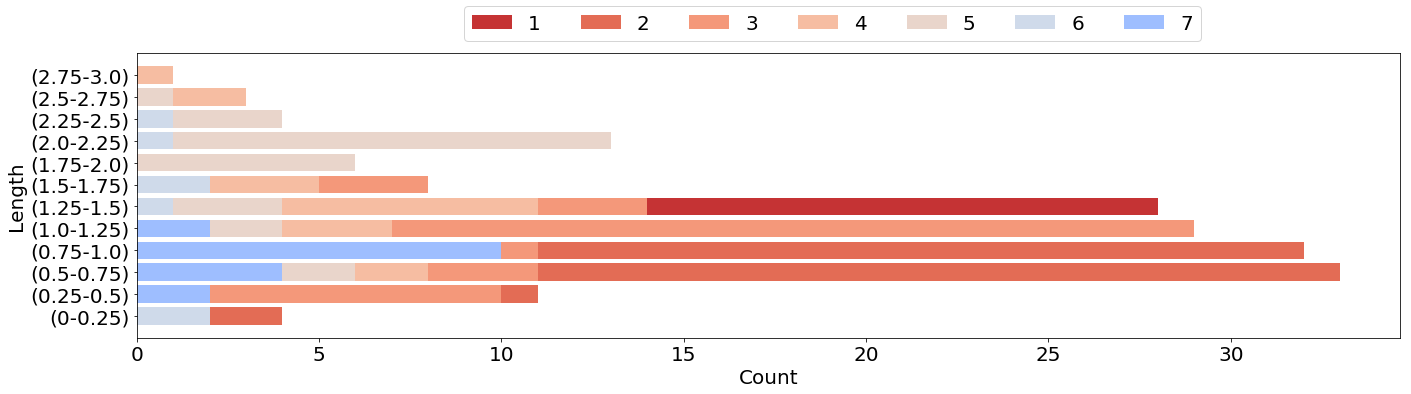

In [59]:
scale = ["1",  "2", "3", "4", "5", "6", "7" ]
plotBarChartWithCounts(countsPerLengthQ1, LQ1, 0, scale)
plotBarChartWithCounts(countsPerLengthQ2, LQ2, 1, scale)
plotBarChartWithCounts(countsPerLengthQ3, LQ3, 2, scale)


[ 64.28571429  51.51515152  67.81609195  58.18452381  62.79069767
  42.04081633 118.63354037  87.75510204  61.65413534 104.08163265
  97.14285714 185.71428571]
[ 64.28571429  69.6969697   84.89326765  78.7202381   70.43189369
  53.06122449 118.63354037  89.79591837  90.22556391 100.
  74.28571429 157.14285714]
[ 80.6122449   61.03896104  72.4137931   85.56547619  70.7641196
  52.65306122 122.36024845 120.40816327 114.28571429 144.89795918
 125.71428571 185.71428571]


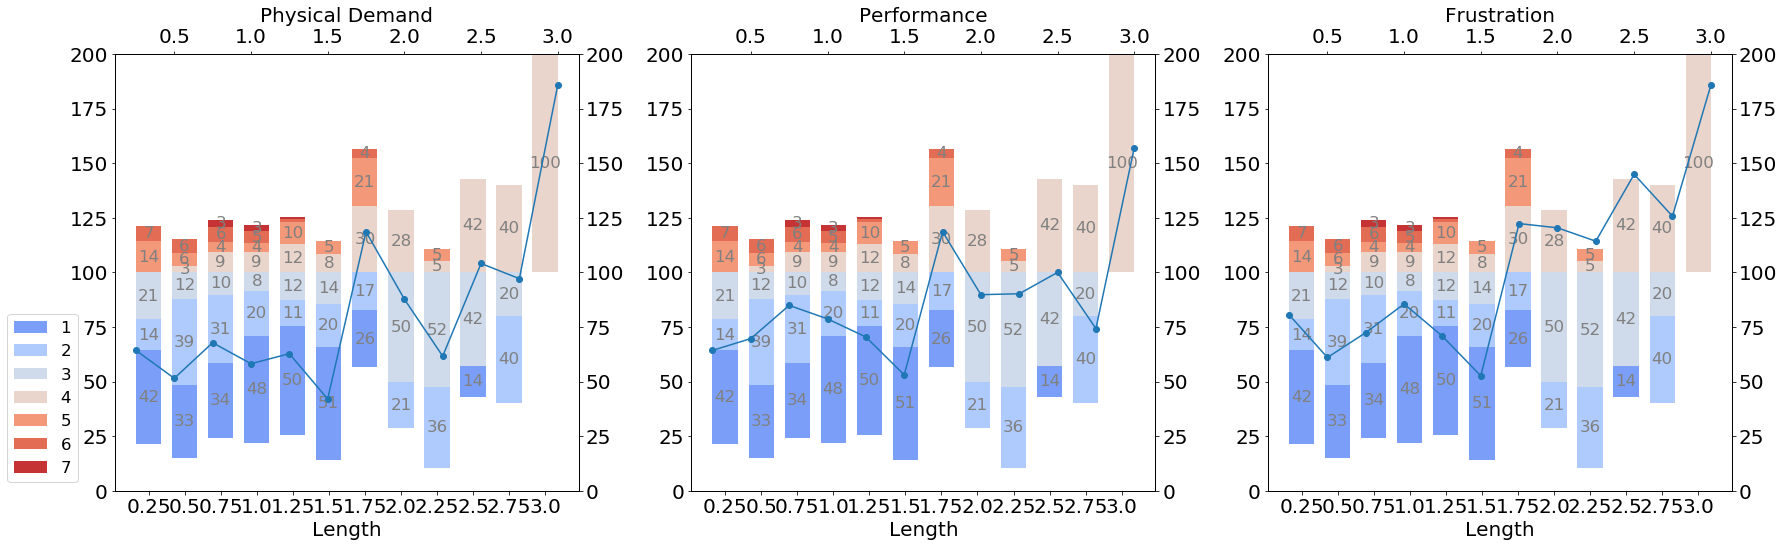

In [140]:
def survey(results, category_names, labels, fig, ax, idx, title, a, l):
    data = np.array(list(results))
    data_cum = data.cumsum(axis=1)
    blue_map = plt.get_cmap('coolwarm')
    cols7 = [0.2, 0.35, 0.45, 0.55, 0.75, 0.85, 0.95]
    limits = [min(a), max(a)]
    
    ax[idx].yaxis.set_visible(True)
    ax[idx].set_xlabel('Length')
    ax[idx].set_ylim(0, np.sum(data, axis=1).max() + np.sum(data, axis=1).max())
    ax[idx].set_title(title)
    
    down = np.abs(100 - data_cum[:, 2])
    
    for i, (colname) in enumerate(category_names):
        widths = data[:, i]
        #print(down +  data_cum[:, i] - widths)
        starts = down + data_cum[:, i] - widths
        
        ax[idx].bar(labels, width=0.7, bottom=starts, height=widths,color=blue_map(cols7[i]))
       
        xcenters = starts + widths / 2
            
        
        text_color = 'grey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if(c > 2):
                ax[idx].text(y,x, str(int(c)), ha='center', va='center',color=text_color, fontsize='small')
    newData = [x * 200.0 / 7 for x in a] + down
    print(newData)
    ax2 = ax[idx].twinx()
    ax3 = ax2.twiny()
   # ax2.set_ylim(limits[1])
    ax3.set_ylim([0, 200])
    #ax3.set_ylabels([])
    #ax2 = ax[idx].twinx()  # instantiate a second axes that shares the same x-axis
    ax3.plot(l, newData ,"-o")
    


ylabels = []
for i in range(0,len(LQ1)):
    ylabels.append(str(LQ1[i]))


fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,8))
scale = ["1",  "2", "3", "4", "5", "6", "7" ]
survey(fq1, scale, ylabels, fig, ax, 0, questions[0], avg1, LQ1)
survey(fq1, scale, ylabels, fig, ax, 1, questions[1], avg2, LQ2)
survey(fq1, scale, ylabels, fig, ax, 2, questions[2], avg3, LQ3)
ax[0].legend(scale, ncol=1, bbox_to_anchor=(-0.25, 0), loc='lower left', fontsize='small')
plt.tight_layout()
plt.savefig("PerceivedEffortPhase2tmp",bbox_inches='tight', dpi=150)
plt.show()

# plot average trend 
def PlotAvg(QuestionAvg, QLengths, idx):
    plt.plot(QLengths, QuestionAvg, "-o")
    plt.title(questions[idx] + " as length increases (average accross participants)") 
    plt.xlabel("Length (m)") 
    plt.ylabel(questions[idx]) 
    plt.grid(True) 
    plt.xticks(np.arange(0, 3.5, step=0.5)) 
   # plt.yticks(np.arange(1, 7, step=1))
    plt.show()




In [ ]:
findCorelation(Q1_sorted, Q3_sorted, "Effort vs frustration")
findCorelation(Q2_sorted, Q3_sorted, "Performance vs frustration")
findCorelation(Q1_sorted, Q2_sorted, "Effort vs performance")

# plt.hist(Q1_sorted)
# plt.show()
# plt.hist(Q3_sorted)

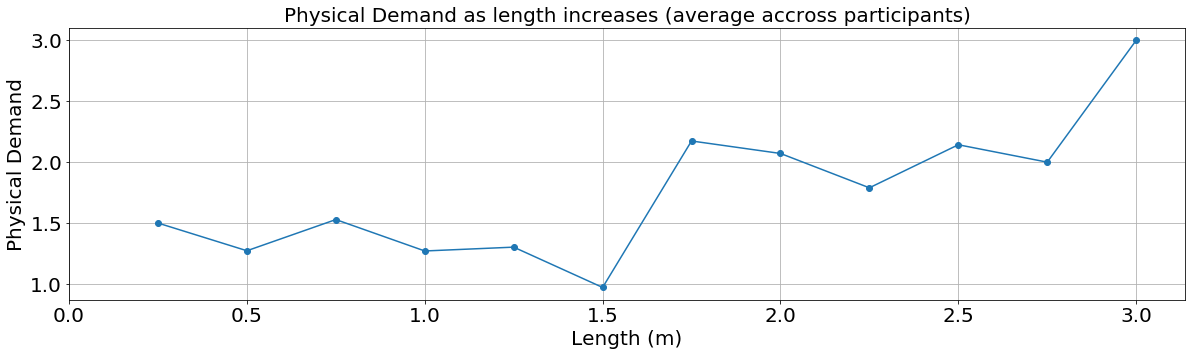

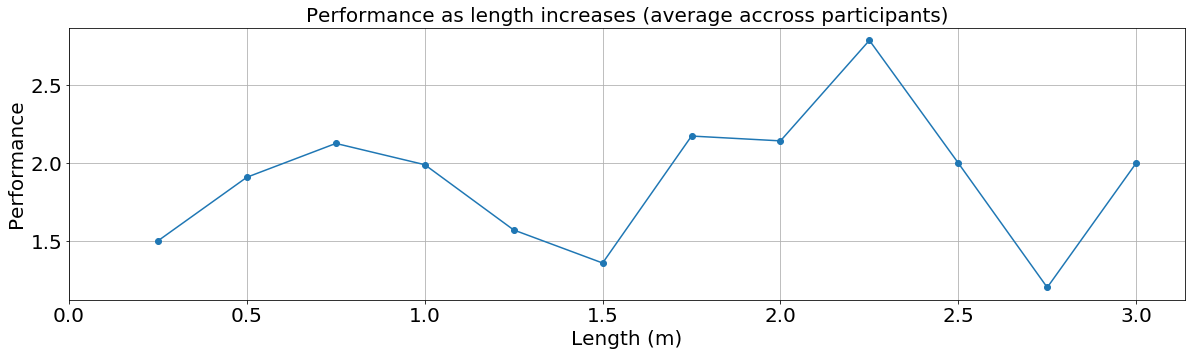

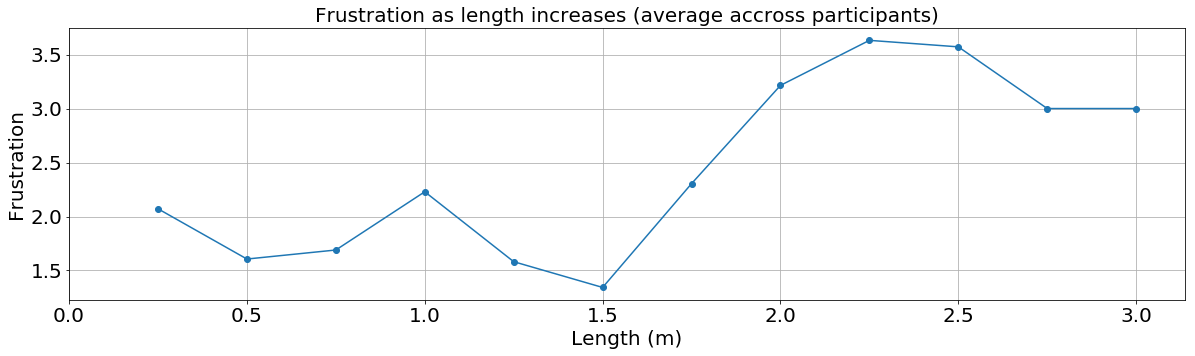

In [66]:
PlotAvg(avg1, LQ1, 0)
PlotAvg(avg2, LQ2, 1)
PlotAvg(avg3, LQ3, 2)

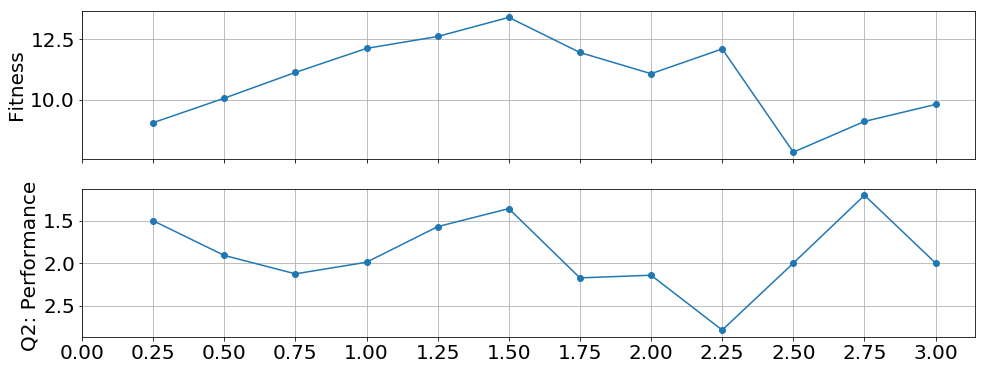

In [67]:
# perceived performance vs actual performance - average

def getAvgFitness(fitness, l): # l is all lenghts for all participants sorted
    step = 0.25 # 1 
    maxL = 3 #12
    start = 0.25 #1
    i = 0
    binn = 0
    countsPerLenght = np.array([0] * (int((maxL / step) )))
    averagePerLength = np.array([0.0] * (int((maxL / step) ) ))
    lengths = np.array([0.0] * (int((maxL / step) ) ))
    
    while(start < maxL and i < len(l)):
        if (l[i] > start):
            binn += 1
            lengths[binn - 1] = start
            start += step
       
        countsPerLenght[binn]  += 1
        averagePerLength[binn] += fitness[i] 
        i+=1
        
    lengths[binn] = start
    for i in range(len(countsPerLenght)):
        averagePerLength[i] = averagePerLength[i] / countsPerLenght[i]
    
    return (lengths, averagePerLength)

lSorted, fitnessSorted = getCombinedPlot(mergedLengths, mergedFitness)
LActual, actualPerformance = getAvgFitness(fitnessSorted, lSorted)



fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize=(16,6))
axs[0].plot(LActual, actualPerformance , "-o")
#axs[0].set_title("Actual vs perceived Performance ") 
axs[0].set_ylabel("Fitness")
axs[0].set_xlabel(" ")
axs[0].grid(True)
axs[0].set_xticklabels([])
axs[0].set_xticks(np.arange(0, 3.25, 0.25))

axs[1].plot(LQ2, avg2 ,"-o")
axs[1].set_ylabel("Q2: Performance ")
axs[1].invert_yaxis()
axs[1].grid(True)
axs[1].set_xticks(np.arange(0, 3.25, 0.25))
plt.savefig("PerceivedVsActualPerformance",bbox_inches='tight', dpi=150)

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression
import statsmodels.api as sm

def create_polynomial_regression_model(degree, X_train, Y_train):
 # "Creates a polynomial regression model for the given degree"

    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)

    f, p = f_regression(X_train_poly, Y_train, center=True)
    
    print("results for polynomial of degree:", degree)
    print("RMSE is {}".format(rmse_train))
    print("R2 score is {}".format(r2_train))

    
    X2 = sm.add_constant(X_train_poly)
    est = sm.OLS(Y_train, X2)
    est2 = est.fit()
    summary = est2.summary()
    #print(summary)
    
    print("\n")
lSorted, fitnessSorted = getCombinedPlot(mergedLengths, mergedFitness)
fitnessFeatureVector = np.array([[x] for x in fitnessSorted])
Q2FeatureVector = [[x] for x in Q2_sorted]
#create_polynomial_regression_model(1, fitnessFeatureVector, Q2_sorted) 
create_polynomial_regression_model(2, fitnessFeatureVector, Q2_sorted) 
create_polynomial_regression_model(11, fitnessFeatureVector, Q2_sorted) 


results for polynomial of degree: 2
RMSE is 1.5260126379727856
R2 score is 0.032649788963329485


results for polynomial of degree: 11
RMSE is 1.5040627288187363
R2 score is 0.0602780549221108




c:\users\bruger\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
c:\users\bruger\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
c:\users\bruger\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\bruger\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\bruger\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value enc

In [34]:
from scipy.stats import wilcoxon, ttest

t, p = wilcoxon(fitnessSorted, Q2_sorted)
t, p = ttest(fitnessSorted, Q2_sorted)
print(t, p)

ImportError: cannot import name 'ttest'

In [ ]:
# Perceived efficiency and actual efficiency are correlated until a certain length’s threshold??

#plt.scatter(fitnessSorted, Q2_sorted)
print(len(fitnessSorted))
findCorelation(fitnessSorted, Q2_sorted, " -- Perceived performance vs Actual (total) -- ") #NOP


# split values
for i in range(len(lSorted)):
    if (lSorted[i] > 1.5):
        thIdx = i
        break
        
#print(len(fitnessSorted[:thIdx]), len(fitnessSorted[thIdx:]))
findCorelation(fitnessSorted[:thIdx], Q2_sorted[:thIdx], "Actual Fitness  vs perceived until 1.5m")#YES
findCorelation(fitnessSorted[thIdx:], Q2_sorted[thIdx:], "Actual Fitness  vs perceived after 1.5m")#YES



In [ ]:
# The level of frustration influences perceived efficiency, affecting the benefits of longer arms.

Q3_3, Q2_3 = getCombinedPlot(Q3, Q2)

#avg 
i = 1
s = 0
c = 0
resQ3 = []
resQ2 = []
while i < len(Q3_3):
    if(Q3_3[i] == Q3_3[i-1]):
         s += Q2_3[i]
         c += 1
    else:
        
        resQ2.append(s / c)
        resQ3.append(Q3_3[i-1])
        print(c)
        s = 0
        c = 0
    i += 1
        
print(resQ3)
print(resQ2)
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(10,6))
axs.plot(resQ3, resQ2 , "-o")
axs.set_title("Perceived efficiency as frustration increases ") 
axs.set_ylabel("")
axs.grid(True)
axs.invert_yaxis()


In [ ]:
# perceived performance vs actual performance interpolation

mergedLengthsC, mergedFitnessC = getCombinedPlot(mergedLengths, mergedFitness)
mergedLengthsI, mergedFitnessI = inter(mergedLengthsC, mergedFitnessC, 25)

fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize=(16,10))
axs[0].plot(mergedLengthsI, mergedFitnessI )
axs[0].set_title("Actual Performance - as length increases (interpolation all participants)") 
axs[0].set_ylabel(questions[1])
axs[0].grid(True)

axs[1].plot(LQ2, avg2)
axs[1].set_title("Perceived Performance - as length increases") 
axs[1].set_ylabel(questions[1])
axs[1].invert_yaxis()
axs[1].grid(True)

plt.tight_layout()


In [ ]:
# interpolations

l1, Q1Inter = inter(l_sorted, Q1_sorted, 20)
l2, Q2Inter = inter(l_sorted, Q2_sorted, 20)
l3, Q3Inter = inter(l_sorted, Q3_sorted, 20)

fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize=(16,10))
axs[0].plot(l1, Q1Inter )
axs[0].set_title('answers to questions as length increases - interpolated')
axs[0].set_ylabel(questions[0])
axs[0].grid(True)

axs[1].plot(l2, Q2Inter)
axs[1].set_ylabel(questions[1])
axs[1].grid(True)

axs[2].plot(l3, Q3Inter)
axs[2].set_ylabel(questions[2])
axs[2].grid(True)

plt.tight_layout()